In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = "input/emotion-detection-fer/train" #passing the path with training images
test_dir = "input/emotion-detection-fer/test"   #passing the path with testing images

In [3]:
img_size = 48 #original size of the image

In [4]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
"""
Modeling


model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation = 'softmax'))

"""

"\nModeling\n\n\nmodel = Sequential()\nmodel.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Flatten())\nmodel.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(units = 64,activation = 'relu'

In [7]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [8]:
epochs = 60
batch_size = 64

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [10]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60


359/359 [==============================] - 107s 287ms/step - loss: 9.3164 - accuracy: 0.1912 - val_loss: 8.6584 - val_accuracy: 0.1746
Epoch 2/60
359/359 [==============================] - 103s 287ms/step - loss: 8.2910 - accuracy: 0.2311 - val_loss: 7.6255 - val_accuracy: 0.2703
Epoch 3/60
359/359 [==============================] - 107s 297ms/step - loss: 7.3017 - accuracy: 0.2530 - val_loss: 6.5433 - val_accuracy: 0.3310
Epoch 4/60
359/359 [==============================] - 115s 321ms/step - loss: 6.3447 - accuracy: 0.2742 - val_loss: 5.7238 - val_accuracy: 0.3282
Epoch 5/60
359/359 [==============================] - 123s 342ms/step - loss: 5.4544 - accuracy: 0.3014 - val_loss: 4.8281 - val_accuracy: 0.3743
Epoch 6/60
359/359 [==============================] - 104s 290ms/step - loss: 4.6748 - accuracy: 0.3266 - val_loss: 4.3176 - val_accuracy: 0.3478
Epoch 7/60
359/359 [==============================] - 108s 300ms/step - loss: 4.0521 - accuracy: 0.3513 - val_loss: 3.6643

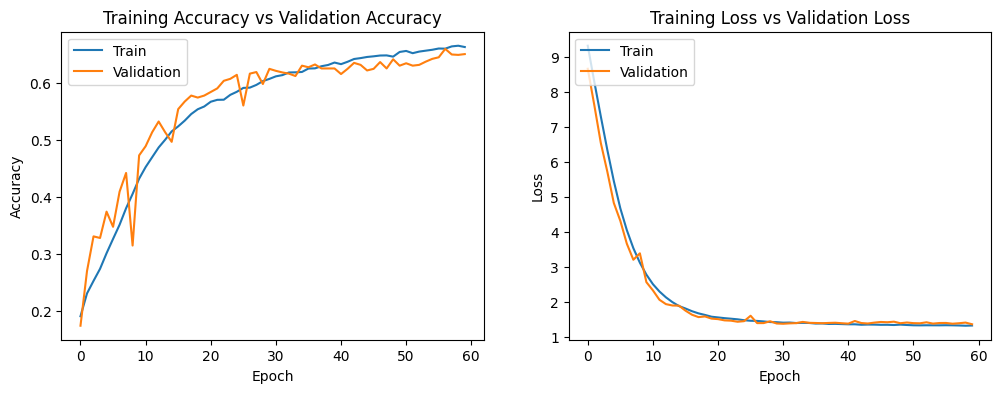

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
model.save('model_optimal.keras')

(48, 48)


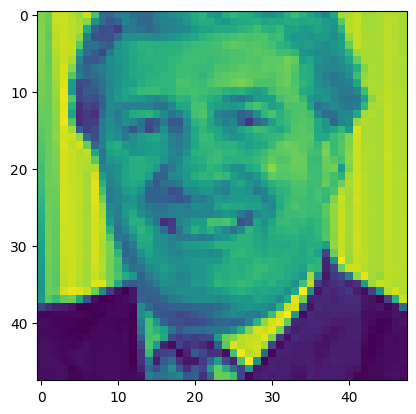

In [58]:
img = image.load_img("input/emotion-detection-fer/test/happy/im45.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [59]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [60]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 41ms/step
[1.0, 0.0, 2.3286622e-17, 0.0, 0.0, 0.0, 0.0]


In [61]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [62]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 2s 75ms/step - loss: 1.3669 - accuracy: 0.6501
final train accuracy = 72.07 , validation accuracy = 65.01


In [63]:
model.save_weights('model_weights.h5')

In [1]:
from tensorflow.keras.models import load_model

# Load the model from the file
model = load_model('model_optimal.keras')

# Now the model is ready to use


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
img = cv2.imread('C:/Users/willy/Downloads/P_20231113_142203.jpg')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(grayscale_image, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    faces = img[y:y + h, x:x + w]
    cv2.imshow('Faces', faces)
    cv2.waitKey(0)

    # Preprocess the image for emotion detection
    faces = cv2.resize(faces, (48, 48))
    faces = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
    faces = np.expand_dims(faces, axis = 0) #makes image shape (1,48,48)
    faces = faces.reshape(1,48,48,1)

    # Perform emotion detection
    result = model.predict(faces)
    result = list(result[0])
    print(result)
    img_index = result.index(max(result))
    print(label_dict[img_index])
    plt.show()


In [1]:
import tensorflow as tf
gpu_test_name = tf.test.gpu_device_name()
print(gpu_test_name)

In [2]:
import tensorflow as tf
print(tf.__version__)


AttributeError: module 'tensorflow' has no attribute '__version__'

In [17]:
# 創建一個新的ImageDataGenerator實例，只包含rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# 加載您的圖像
img = image.load_img("C:/圖像辨識/input/emotion-detection-fer/test/happy/im3.png", target_size=(48,48), color_mode="grayscale")

# 將圖像轉換為numpy數組並進行必要的形狀調整
img = np.array(img)
img = np.expand_dims(img, axis=0)
img = img.reshape(1,48,48,1)

# 將img轉換為浮點數
img = img.astype('float32')

# 使用剛剛建立的datagen進行圖像縮放
img = test_datagen.standardize(img)

# 現在您可以使用模型進行預測了
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()


1/1 [==============================] - 1s 650ms/step
[0.0013417065, 0.00075875386, 0.0020965117, 0.8461449, 0.14228657, 0.0051898714, 0.0021816965]
Happy


<h1>單張辨識</h1>

1/1 [==============================] - 0s 26ms/step
[0.008854399, 5.3925407e-05, 0.07460237, 0.5201083, 0.24547085, 0.15014231, 0.00076783827]
Happy


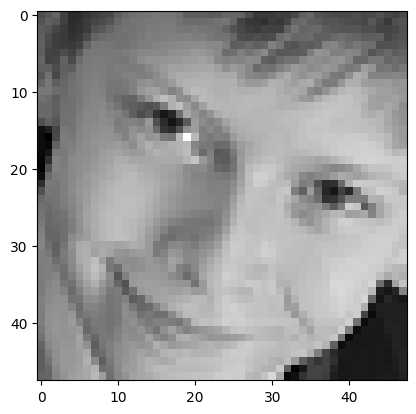

In [50]:
# 創建一個新的ImageDataGenerator實例，只包含rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# 加載您的圖像
img = image.load_img("C:/圖像辨識/input/emotion-detection-fer/test/happy/im94.png", target_size=(48,48), color_mode="grayscale")

# 將圖像轉換為numpy數組並進行必要的形狀調整
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.reshape(1,48,48,1)

# 將img轉換為浮點數
img_array = img_array.astype('float32')

# 使用剛剛建立的datagen進行圖像縮放
img_array = test_datagen.standardize(img_array)

# 現在您可以使用模型進行預測了
result = model.predict(img_array)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])

# 顯示圖像
plt.imshow(img, cmap='gray')


plt.show()


<h1>下載用途</h1>

1/1 [==============================] - 0s 32ms/step
[0.023571977, 0.0002272034, 0.081631444, 0.16758144, 0.36683095, 0.35207275, 0.008084238]
Neutral


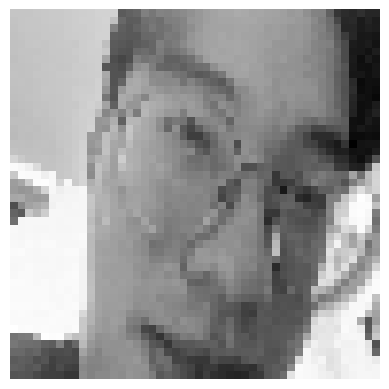

In [48]:
# 創建一個新的ImageDataGenerator實例，只包含rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# 加載您的圖像
img = image.load_img("l.png", target_size=(48,48), color_mode="grayscale")

# 將圖像轉換為numpy數組並進行必要的形狀調整
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.reshape(1,48,48,1)

# 將img轉換為浮點數
img_array = img_array.astype('float32')

# 使用剛剛建立的datagen進行圖像縮放
img_array = test_datagen.standardize(img_array)

# 現在您可以使用模型進行預測了
result = model.predict(img_array)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])

# 顯示圖像
plt.imshow(img, cmap='gray')
plt.axis('off')  # 關閉座標軸
plt.savefig('my_image.png', bbox_inches='tight', pad_inches=0)  # 儲存圖像

plt.show()


<h1>原始處理</h1>

1/1 [==============================] - 0s 93ms/step
[0.020592239, 0.00018758452, 0.045319155, 0.39610562, 0.19646227, 0.33202073, 0.009312441]
Happy


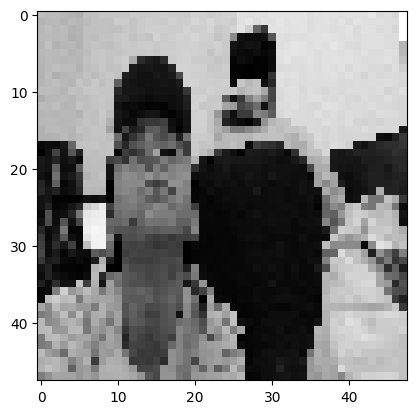

In [26]:
# 創建一個新的ImageDataGenerator實例，只包含rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# 加載您的圖像
img = image.load_img("v.jpg", target_size=(48,48), color_mode="grayscale")

# 將圖像轉換為numpy數組並進行必要的形狀調整
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.reshape(1,48,48,1)

# 將img轉換為浮點數
img_array = img_array.astype('float32')

# 使用剛剛建立的datagen進行圖像縮放
img_array = test_datagen.standardize(img_array)

# 現在您可以使用模型進行預測了
result = model.predict(img_array)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])

# 顯示圖像
plt.imshow(img, cmap='gray')
plt.savefig('my_image.png')

plt.show()

<h1>影片圖像處理(1)</h1>

1/1 [==============================] - 0s 38ms/step


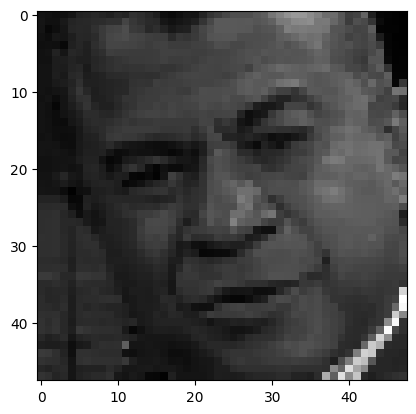

1/1 [==============================] - 0s 31ms/step


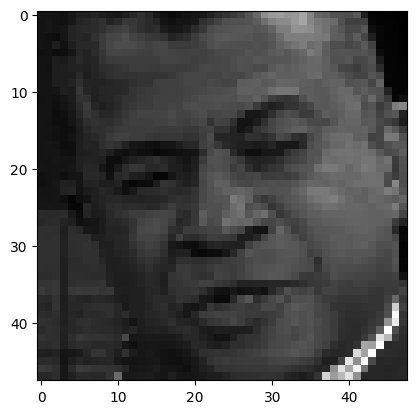

1/1 [==============================] - 0s 34ms/step


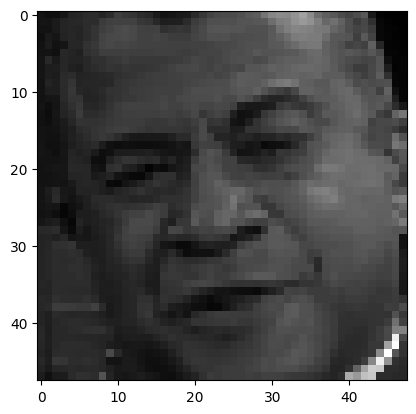

1/1 [==============================] - 0s 26ms/step


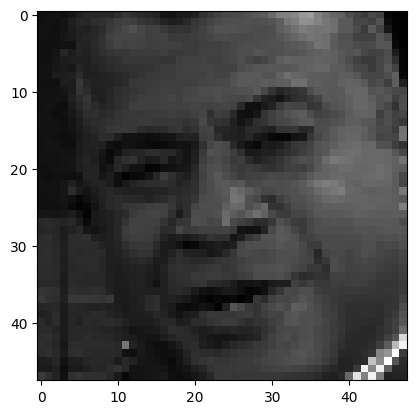

1/1 [==============================] - 0s 23ms/step


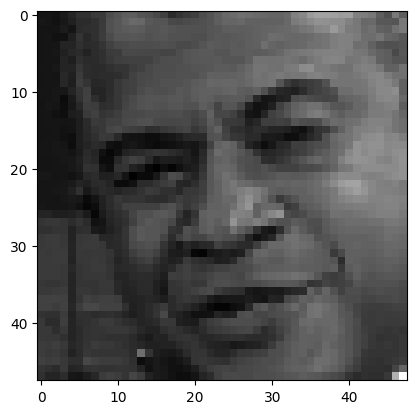

1/1 [==============================] - 0s 25ms/step


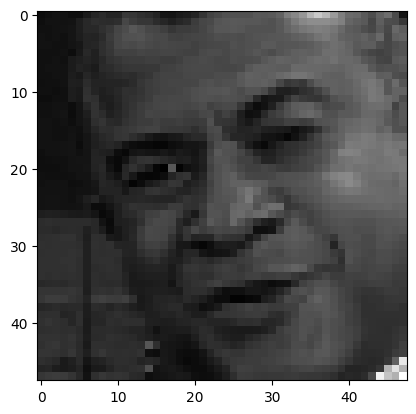

1/1 [==============================] - 0s 30ms/step


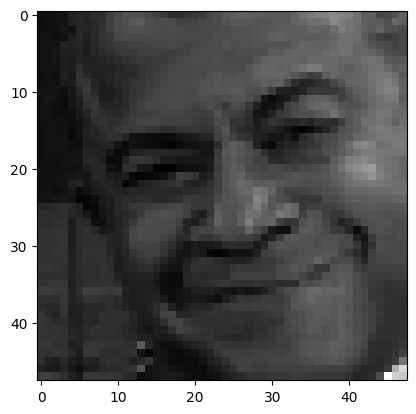

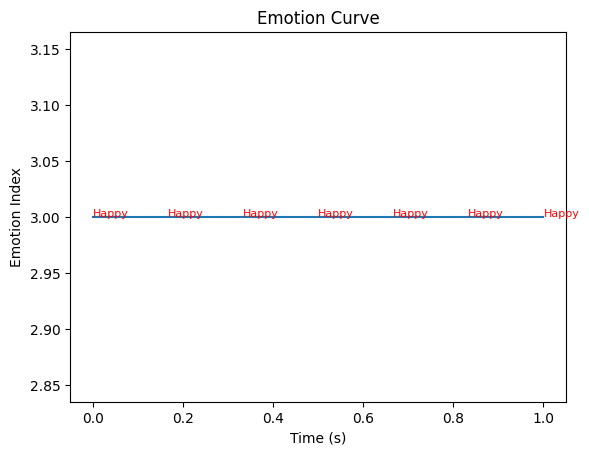

In [42]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 載入模型
#model = load_model('my_model.h5')  # 請替換為您的模型檔案

# 定義情緒標籤
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# 載入臉部偵測模型
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 定義影片檔案路徑
video_path = 'C:/Notebook/input/meld-dataset/MELD-RAW/MELD.Raw/train/train_splits/dia0_utt1.mp4'  # 請替換為您的影片檔案路徑
# 使用 OpenCV 讀取影片
cap = cv2.VideoCapture(video_path)

# 設定時間間隔為 1/5 秒
fps = cap.get(cv2.CAP_PROP_FPS)
interval = int(fps / 5)

# 初始化情緒曲線和標籤

emotion_curve = []
emotion_labels = []

# 創建一個新的ImageDataGenerator實例，只包含rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# 迭代每一個影格
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 將影格轉換為灰階
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 進行臉部偵測
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # 裁剪臉部區域
        face_img = gray[y:y+h, x:x+w]
        # 預處理影格
        face_img = cv2.resize(face_img, (48, 48))
        face_img = np.expand_dims(face_img, axis=0)
        face_img = face_img.reshape(1,48,48,1)

        # 將img轉換為浮點數
        face_img = face_img.astype('float32')

        # 使用剛剛建立的datagen進行圖像縮放
        face_img = test_datagen.standardize(face_img)

        # 使用模型進行情緒分類
        predictions = model.predict(face_img)

        # 將最高機率的情緒索引加入情緒曲線
        emotion_index = np.argmax(predictions)
        emotion_curve.append(emotion_index)

        # 將對應的情緒標籤加入標籤
        emotion_label = label_dict[emotion_index]
        emotion_labels.append(emotion_label)

        # 顯示每一張切割出來的臉部圖片
        plt.imshow(face_img[0,:,:,0], cmap='gray')
        plt.show()

    # 跳過指定的時間間隔
    for _ in range(interval):
        ret, _ = cap.read()
        if not ret:
            break

cap.release()

# 繪製情緒曲線和標籤
time_points = np.arange(0, len(emotion_curve)) * interval / fps
plt.plot(time_points, emotion_curve)
plt.xlabel('Time (s)')
plt.ylabel('Emotion Index')
plt.title('Emotion Curve')

# 在每一個時間點印出情緒標籤
for time_point, emotion_label in zip(time_points, emotion_labels):
    plt.text(time_point, emotion_curve[int(time_point*fps/interval)], emotion_label, color='red', fontsize=8)

plt.show()


<h1>影片圖像處理(2)</h1>

1/1 [==============================] - 0s 28ms/step


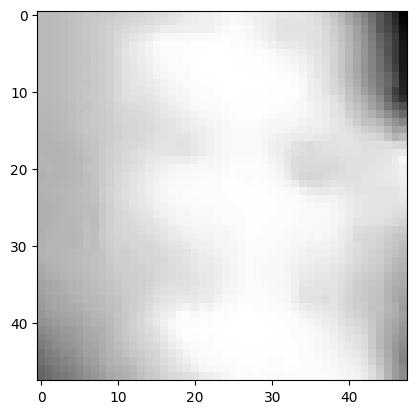

1/1 [==============================] - 0s 31ms/step


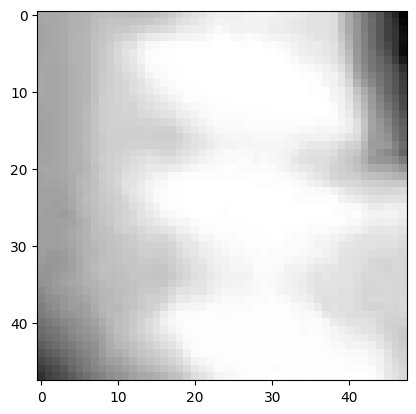

1/1 [==============================] - 0s 27ms/step


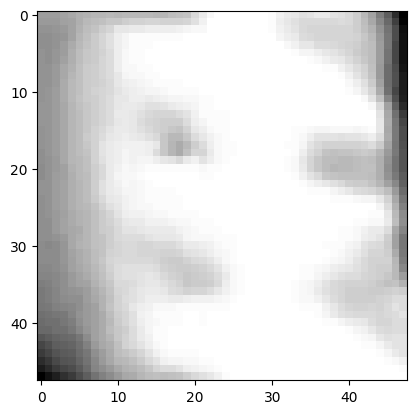

1/1 [==============================] - 0s 27ms/step


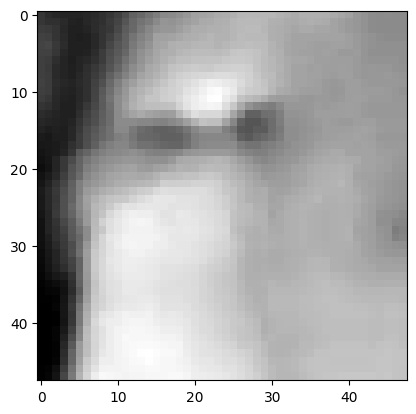

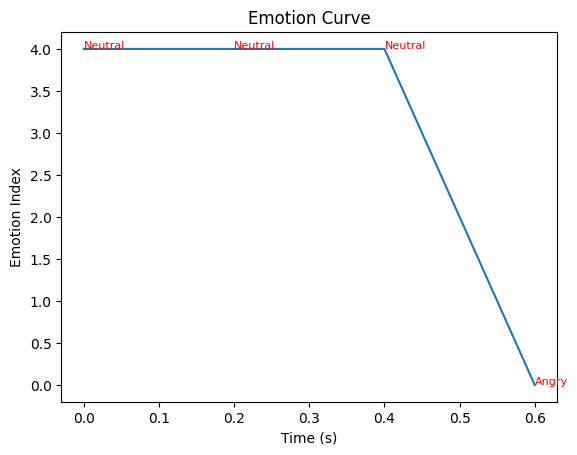

In [49]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 載入模型
#model = load_model('my_model.h5')  # 請替換為您的模型檔案

# 定義情緒標籤
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# 載入臉部偵測模型
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 定義影片檔案路徑
#video_path = 'C:/Notebook/input/meld-dataset/MELD-RAW/MELD.Raw/train/train_splits/dia0_utt6.mp4'  # 請替換為您的影片檔案路徑
video_path = 'C:/圖像辨識/def.mp4'  # 請替換為您的影片檔案路徑

# 使用 OpenCV 讀取影片
cap = cv2.VideoCapture(video_path)

# 設定時間間隔為 1/5 秒
fps = cap.get(cv2.CAP_PROP_FPS)
interval = int(fps / 5)

# 初始化情緒曲線和標籤
emotion_curve = []
emotion_labels = []

# 創建一個新的ImageDataGenerator實例，只包含rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# 迭代每一個影格
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 將影格轉換為灰階
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 進行臉部偵測
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # 檢查是否有偵測到臉部
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            # 裁剪臉部區域
            face_img = gray[y:y+h, x:x+w]
            # 預處理影格
            face_img = cv2.resize(face_img, (48, 48))
            face_img = np.expand_dims(face_img, axis=0)
            face_img = face_img.reshape(1,48,48,1)

            # 將img轉換為浮點數
            face_img = face_img.astype('float32')

            # 使用剛剛建立的datagen進行圖像縮放
            face_img = test_datagen.standardize(face_img)

            # 使用模型進行情緒分類
            predictions = model.predict(face_img)

            # 將最高機率的情緒索引加入情緒曲線
            emotion_index = np.argmax(predictions)
            emotion_curve.append(emotion_index)

            # 將對應的情緒標籤加入標籤
            emotion_label = label_dict[emotion_index]
            emotion_labels.append(emotion_label)

            # 顯示每一張切割出來的臉部圖片
            plt.imshow(face_img[0,:,:,0], cmap='gray')
            plt.show()

    # 跳過指定的時間間隔
    for _ in range(interval):
        ret, _ = cap.read()
        if not ret:
            break

cap.release()

# 繪製情緒曲線和標籤
time_points = np.arange(0, len(emotion_curve)) * interval / fps
plt.plot(time_points, emotion_curve)
plt.xlabel('Time (s)')
plt.ylabel('Emotion Index')
plt.title('Emotion Curve')

# 在每一個時間點印出情緒標籤
for time_point, emotion_label in zip(time_points, emotion_labels):
    plt.text(time_point, emotion_curve[int(time_point*fps/interval)], emotion_label, color='red', fontsize=8)

plt.show()
